In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('classified_data.csv',index_col=0)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
sc = StandardScaler()
sc.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [6]:
scaled_features = sc.transform(df.drop('TARGET CLASS',axis=1))

In [7]:
X = pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [8]:
X.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [9]:
y = df['TARGET CLASS']
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=0)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier(n_neighbors=1)

In [13]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
predictions = knn.predict(X_test)
confusion_matrix(y_test,predictions)

array([[100,  13],
       [ 14, 123]], dtype=int64)

In [16]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       113
           1       0.90      0.90      0.90       137

    accuracy                           0.89       250
   macro avg       0.89      0.89      0.89       250
weighted avg       0.89      0.89      0.89       250



In [17]:
error = []
for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error.append(np.mean(y_test!=y_pred))

Text(0, 0.5, 'Error Rate')

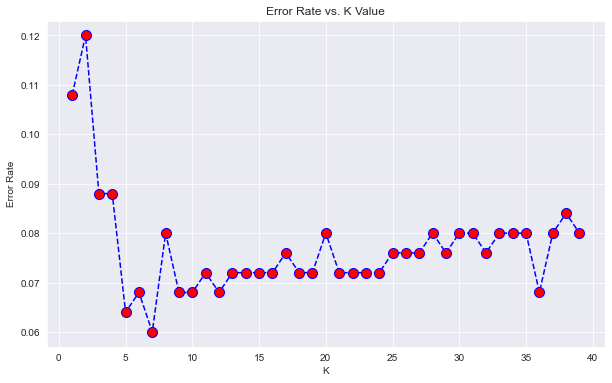

In [18]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [19]:
knn1 = KNeighborsClassifier(n_neighbors=7)

In [20]:
knn1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [21]:
predictns = knn1.predict(X_test)

In [22]:
confusion_matrix(y_test,predictns)

array([[105,   8],
       [  7, 130]], dtype=int64)

In [23]:
print(classification_report(y_test,predictns))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       113
           1       0.94      0.95      0.95       137

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250



# Using Cross Validation

In [24]:
from sklearn.model_selection import cross_val_score
accuracy = []
for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    cross_val = cross_val_score(knn,X,y,cv=10)
    accuracy.append(cross_val.mean())

In [25]:
error = []
for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    cross_val = cross_val_score(knn,X,y,cv=10)
    error.append(1-cross_val.mean())

Text(0, 0.5, 'Error Rate')

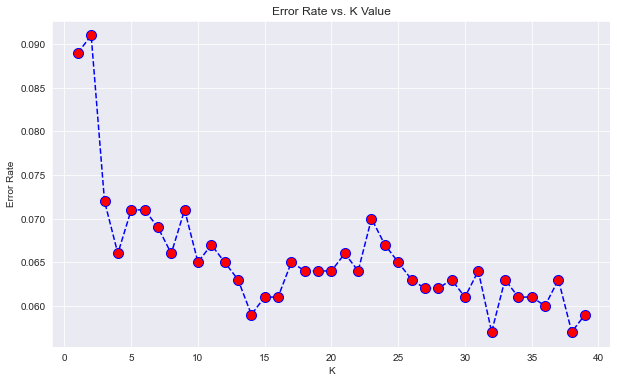

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error,color='blue', linestyle='dashed', marker='o',
       markerfacecolor='red', markersize=10)
#plt.plot(range(1,40),accuracy,color='blue', linestyle='dashed', marker='o',
#         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [27]:
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [28]:
pred = knn.predict(X_test)

In [29]:
confusion_matrix(y_test,pred)

array([[103,  10],
       [  8, 129]], dtype=int64)

In [30]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       113
           1       0.93      0.94      0.93       137

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250



In [31]:
len(y_test)

250

In [32]:
import math

In [33]:
math.sqrt(len(y_test))

15.811388300841896